In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_origin = pd.read_csv('sample_kuku.csv')
data = data_origin.copy()
data.head(5)

,ID,Sales Price,Registered Year,Sale Date,City,Address,Evaluation price,Sales Ratio,Category,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,604332,391000.0,2010,04/19/2011,Bethany,77 CARRIAGE DR.,321150.0,0.821355,Single Family,Single Family,NaN,NaN,NaN,NaN
1,221677,306000.0,2002,03/04/2003,Norwalk,46 SUNRISE HILL RD,123480.0,0.403529,NaN,NaN,NaN,NaN,NaN,POINT (-73.41734 41.1312)
2,257730,155000.0,2003,09/02/2004,Griswold,30 EDWARD AVE,86170.0,0.555935,NaN,NaN,NaN,NaN,NaN,POINT (-71.90071 41.57833)
3,482065,122900.0,2006,01/16/2007,Newington,278 2 RICHARD ST,76790.0,0.624817,Condo,Condo,NaN,NaN,NaN,NaN
4,316474,115000.0,2004,04/07/2005,Bridgeport,233 LEWIS ST,0.0,0.000000,NaN,NaN,7.0,NaN,NaN,NaN


In [4]:
# 칼럼 리스트
data_cols = list(data.columns)
data_cols

['ID',
 'Sales Price',
 'Registered Year',
 'Sale Date',
 'City',
 'Address',
 'Evaluation price',
 'Sales Ratio',
 'Category',
 'Residential Type',
 'Non Use Code',
 'Assessor Remarks',
 'OPM remarks',
 'Location']

- ID 아이디
- Sales Price 판매가격
- Registered Year 등록 연도
- Sale Date 판매 날짜
- City 도시
- Address 주소
- Evaluation price 공시지가
- Sales Ratio 공시지가 / 판매가격
- Category 건물 카테고리
- Residential Type 거주 유형
- Non Use Code ??
- Assessor Remarks 감정사 비고
- OPM remarks ??
- Location ??

In [5]:
data_types = data.dtypes
data_types

int64 = data_types[data_types == 'int64'].index.tolist()
float64 = data_types[data_types == 'float64'].index.tolist()
_object = data_types[data_types == 'object'].index.tolist()

print(f'정수형 : {int64}')
print(f'실수형 : {float64}')
print(f'문자열 : {_object}')

정수형 : ['ID', 'Registered Year']
실수형 : ['Sales Price', 'Evaluation price', 'Sales Ratio', 'OPM remarks']
문자열 : ['Sale Date', 'City', 'Address', 'Category', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'Location']


In [6]:
# 범주형 데이터 값 보기
Category_features = data['Category'].unique()
print(f'Category features : {Category_features.tolist()}')

Residential_Type_features = data['Residential Type'].unique()
print(f'Residential Type features : {Residential_Type_features.tolist()}')

Category features : ['Single Family', nan, 'Condo', 'Residential', 'Three Family']
Residential Type features : ['Single Family', nan, 'Condo', 'Three Family']


In [109]:
data['Residential Type'].unique()

array(['Single Family', nan, 'Condo', 'Three Family'], dtype=object)

In [108]:
data['Category'].unique()

array(['Single Family', nan, 'Condo', 'Residential', 'Three Family'],
      dtype=object)

In [83]:
print("City 종류 개수\t\t\t: ", len(data['City'].unique()))
print("Address 종류 개수\t\t: ", len(data['Address'].unique()))
print("Category 종류 개수\t\t: ", len(data['Category'].unique()))
print("Residential Type 종류 개수\t: ", len(data['Residential Type'].unique()))

City 종류 개수			:  61
Address 종류 개수		:  105
Category 종류 개수		:  5
Residential Type 종류 개수	:  4


In [7]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105.0,560143.285714,287046.718676,10334.0,316474.000,593960.000000,794505.000000,1.050176e+06
Sales Price,105.0,362801.942857,523754.811733,7500.0,125000.000,220000.000000,396227.000000,4.280577e+06
Registered Year,105.0,2011.000000,6.084343,2001.0,2006.000,2011.000000,2016.000000,2.021000e+03
Evaluation price,105.0,343411.428571,941957.251041,0.0,78600.000,148910.000000,247200.000000,8.667820e+06
Sales Ratio,105.0,2.498216,15.610815,0.0,0.513,0.638657,0.780436,1.575967e+02
OPM remarks,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# 결측치 비율
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data), 3)

missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율'])
print(missing_info)

                  결측치 수  결측치 비율
ID                    0   0.000
Sales Price           0   0.000
Registered Year       0   0.000
Sale Date             0   0.000
City                  0   0.000
Address               0   0.000
Evaluation price      0   0.000
Sales Ratio           0   0.000
Category             37   0.352
Residential Type     37   0.352
Non Use Code         72   0.686
Assessor Remarks     86   0.819
OPM remarks         105   1.000
Location             83   0.790


Text(0.5, 1.0, 'Histogram of Sales Price')

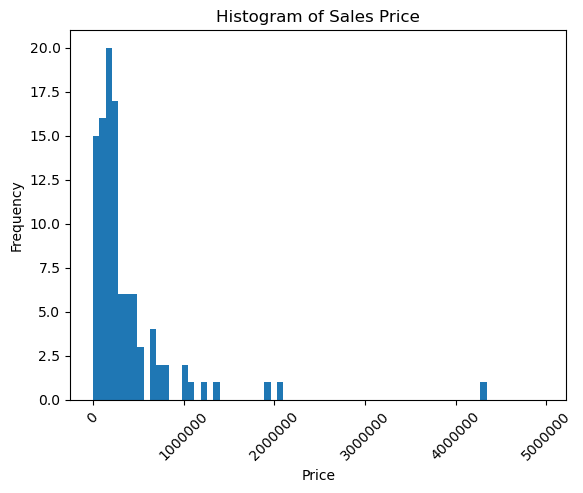

In [31]:
# 판매가격 히스토그램
plt.hist(data['Sales Price'], bins=range(0, 5000000, 70000))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# details
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Price')

Text(0.5, 1.0, 'Histogram of Evaluation Price')

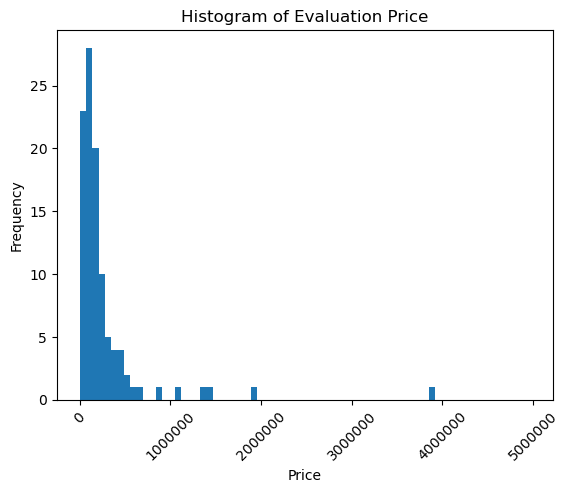

In [33]:
# 공시지가 히스토그램
plt.hist(data['Evaluation price'], bins=range(0, 5000000, 70000))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# details
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Evaluation Price')

Text(0.5, 1.0, 'Histogram of Sales Ratio')

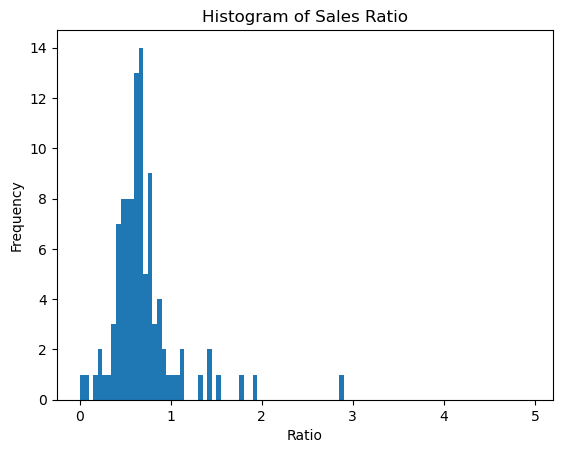

In [46]:
# Sales Ratio 히스토그램
plt.hist(data['Sales Ratio'], bins=np.arange(0, 5, 0.05))
plt.ticklabel_format(style='plain', axis='x')
#plt.xticks(rotation=45)

# details
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Ratio')

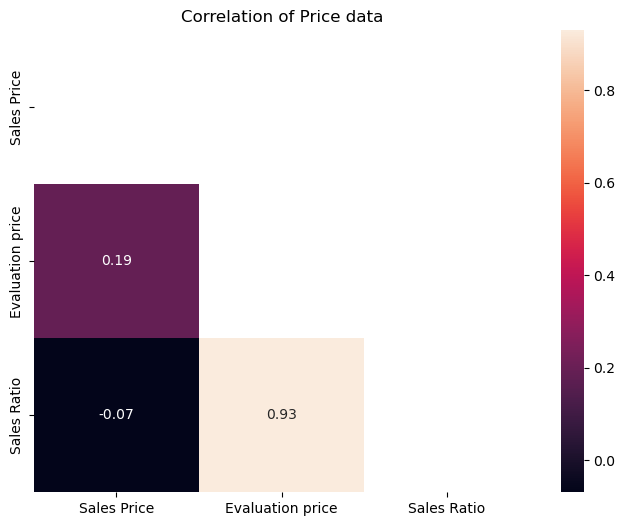

In [89]:
# 판매가격과 공시지가 상관관계 히트맵
df_price = data[['Sales Price', 'Evaluation price', 'Sales Ratio']]

corr = df_price.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, mask=mask, fmt=".2f").set(title='Correlation of Price data')
plt.show()

# 공시지가와 Sales Ratio 상관관계가 매우 높음
# 나머지는 유의미하지 않음
# Sales Ratio = 공시지가/판매가격

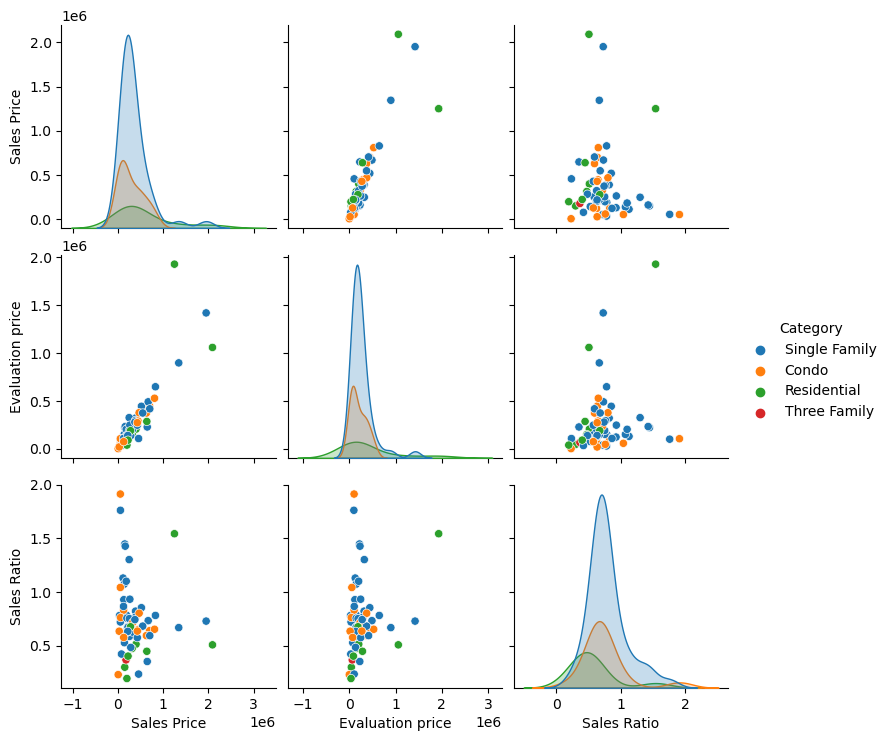

In [96]:
# scattermatrix
selected_columns = ['Sales Price', 'Evaluation price', 'Sales Ratio', 'Category']
sns.pairplot(data[selected_columns], hue='Category')

# 카테고리별 가격 차이? 가 나타나지 않음

#### 결측치 보간
- 범주형 변수(Categroy랑 Residential Type) 보간하는 것이 관건인듯
    - 지도학습(회귀, classificaiton, DecisionTree, RandomForest 등)
    - 비지도 -> K-means, 계층적 군집화 (클러스터링), 연관규칙학습
    - 균등분포
- 수치형 변수는 중앙값, 평균, mice 등으로 대치

https://velog.io/@ssulee0206/Data-Imputation%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B2%B0%EC%B8%A1%EC%B9%98-%EC%B2%98%EB%A6%AC


In [107]:
# Clustering
# k-means, 계층적
# 연관규칙

---

In [98]:
# 수치형 변수 보간
from sklearn.impute import SimpleImputer

In [ ]:
# 평균으로 Imputer 선언
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(numeric_data)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
numeric_data = imputer_mean.transform(numeric_data)

In [ ]:
# 중간값으로 Imputer 선언
imputer_mid = SimpleImputer(strategy='median')
imputer_mid.fit(numeric_data)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
numeric_data = imputer_mid.transform(numeric_data)

In [ ]:
# 최빈값으로 Imputer 선언
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mode.fit(categorical_data)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
categorical_data = imputer_mode.transform(categorical_data)

In [ ]:
# MICE 보간 : Round Robin 방식을 반복하여 결측값을 회귀하는 방식으로 처리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# random_state값은 원하시는 숫자 아무거나 넣으시면 됩니다.
imputer_mice = IterativeImputer(random_state=83)
numeric_data = imputer_mice.fit_transform(numeric_data)